<a href="https://colab.research.google.com/github/gosaitos/Computer_vision/blob/main/Image_restoration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image restoration:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import seaborn as sns
from scipy.stats import hmean , gmean

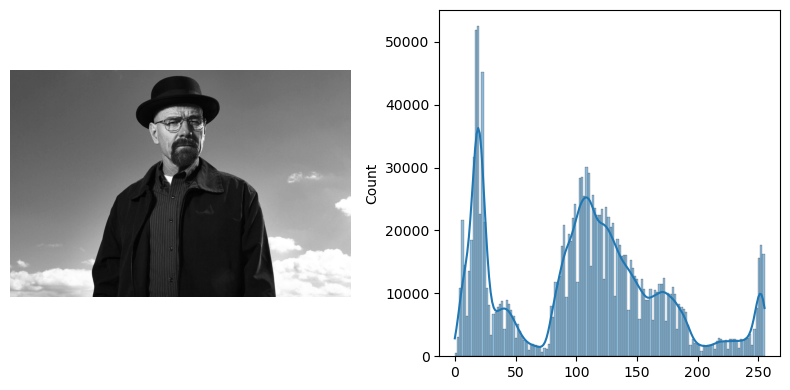

In [ ]:
image = cv2.cvtColor(imread("ww.jpg"),cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.subplot(122)
sns.histplot(image.ravel(),kde=True)
plt.tight_layout()
plt.show()

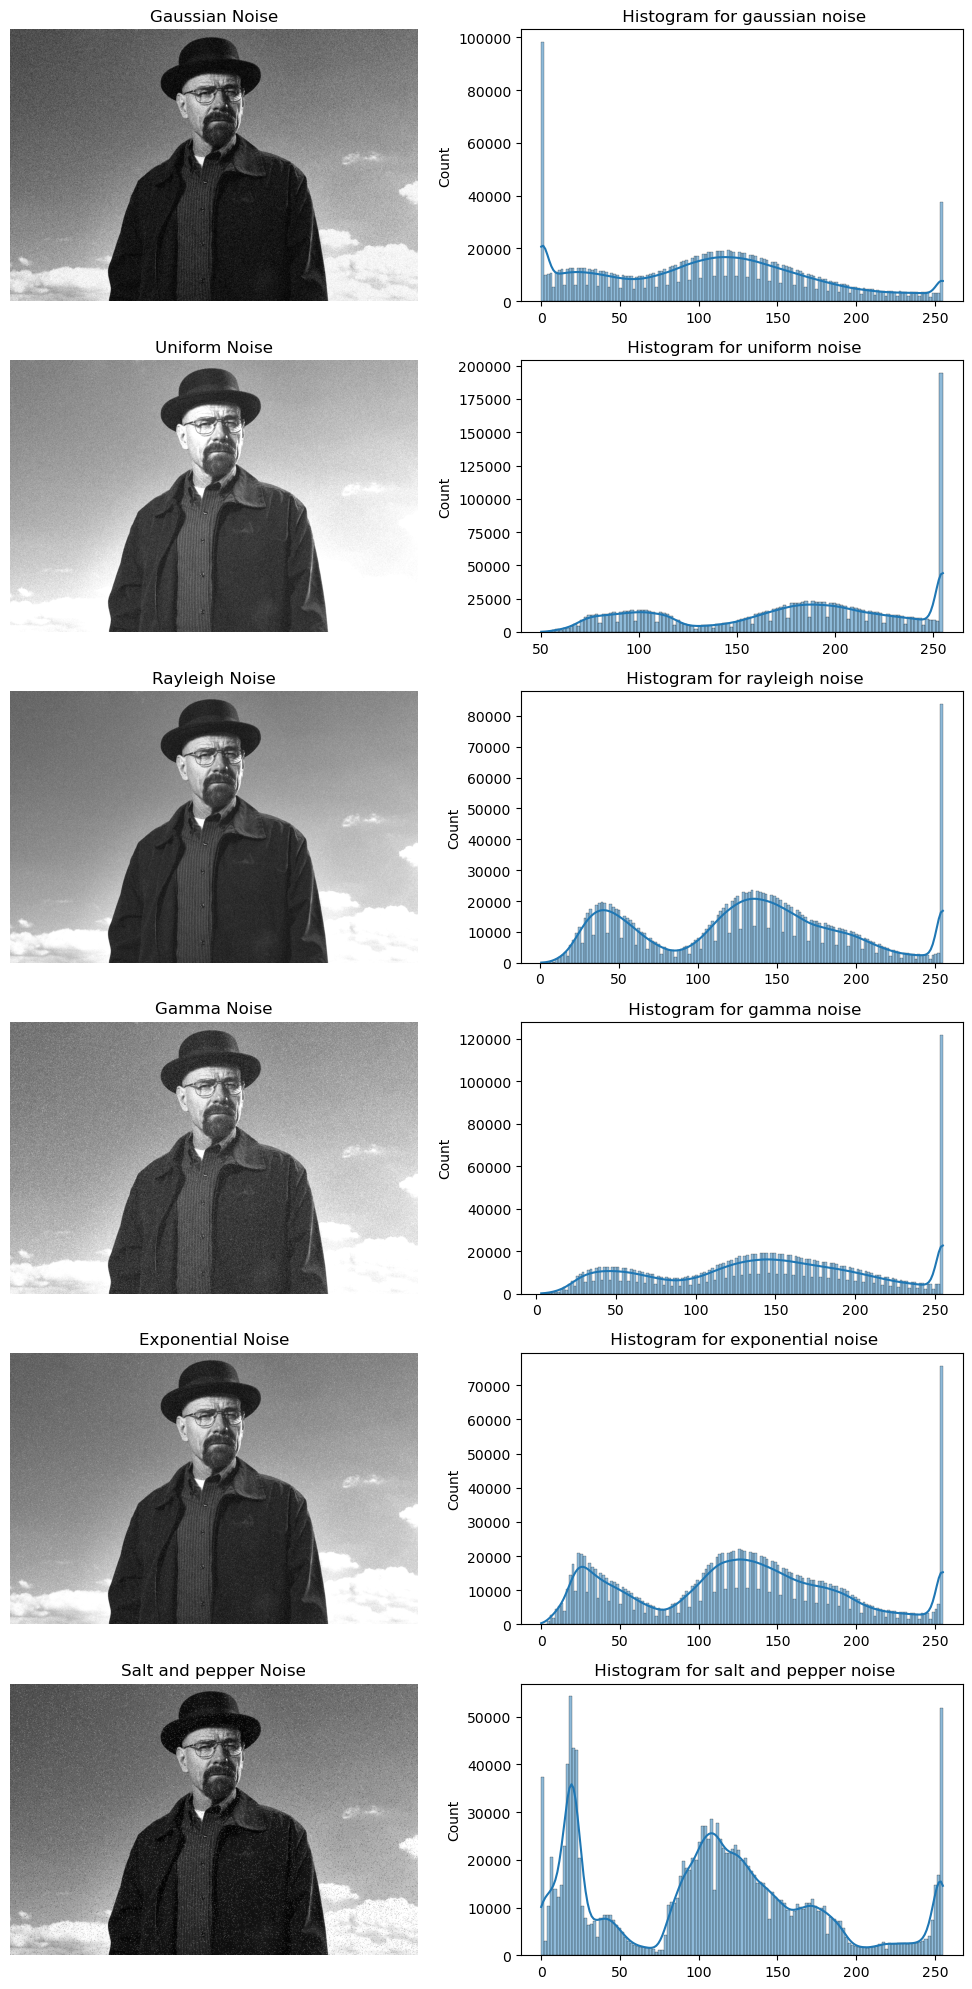

In [ ]:
plt.figure(figsize=(10, 20))

def add_noise(image, method, idx=0, mean=0, std=25, low=50, high=100, scale=20, shape=2, noise_ratio=0.05):
    noisy_image = image.copy()
    if method == "gaussian":
        noise = np.random.normal(mean, std, image.shape)
        noisy_image = image + noise
    elif method == "rayleigh":
        noise = np.random.rayleigh(scale, image.shape)
        noisy_image = image + noise
    elif method == "gamma":
        noise = np.random.gamma(shape, scale, image.shape)
        noisy_image = image + noise
    elif method == "exponential":
        noise = np.random.exponential(scale, image.shape)
        noisy_image = image + noise
    elif method == "uniform":
        noise = np.random.uniform(low, high, image.shape)
        noisy_image = image + noise
    elif method == "salt and pepper":
        noisy_image = impulse(image, noise_ratio)
    else:
        print("Invalid Noise method")
        return image

    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    if idx == None:
        return noisy_image

    plt.subplot(6, 2, idx)
    plt.imshow(noisy_image, cmap='gray')
    plt.title(f"{method.capitalize()} Noise")
    plt.axis('off')
    plt.subplot(6, 2, idx+1)
    sns.histplot(noisy_image.ravel(),kde=True)
    plt.title(f" Histogram for {method} noise")

    return noisy_image

def impulse(image, noise_ratio):
    noisy_image = image.copy()
    h, w = noisy_image.shape
    noisy_pixels = int(h * w * noise_ratio)

    for _ in range(noisy_pixels):
        row, col = np.random.randint(0, h), np.random.randint(0, w)
        noisy_image[row, col] = 0 if np.random.rand() < 0.5 else 255

    return noisy_image

noise = ['gaussian','uniform','rayleigh','gamma','exponential','salt and pepper']
idx = 1
for i in range(len(noise)):
    i_img = image.copy()
    i_img = add_noise(image,noise[i],idx)
    idx += 2
plt.tight_layout()
plt.show()

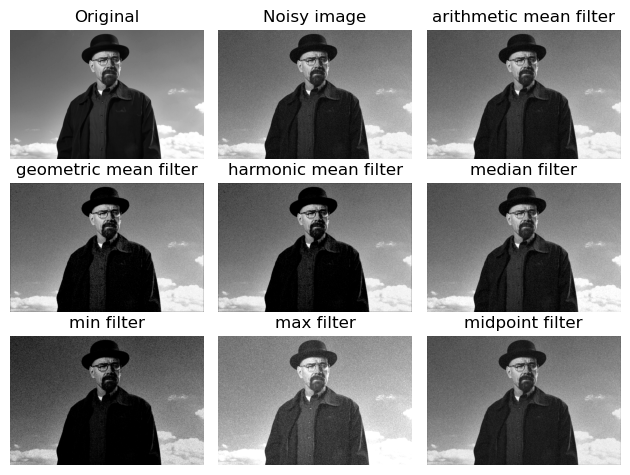

In [ ]:
def remove_noise(img, filter_type, kernel_size=3):
    h, w = img.shape
    padded_image = np.pad(img, kernel_size // 2, mode='constant', constant_values=255 if filter_type == 'min' else 0)
    filtered_img = np.zeros_like(img)

    for i in range(1, h + 1):
        for j in range(1, w + 1):
            window = padded_image[i - 1:i + 2, j - 1:j + 2]  # 3x3 window
            val = 0
            if filter_type == 'arithmetic mean':
                val = np.mean(window)
            elif filter_type == 'geometric mean':
                val = gmean(window.flatten())
            elif filter_type == 'harmonic mean':
                val = hmean(window.flatten())
            elif filter_type == 'median':
                val = np.median(window)
            elif filter_type == 'min':
                val = np.min(window)
            elif filter_type == 'max':
                val = np.max(window)
            elif filter_type == 'midpoint':
                b = window.astype(np.int32)
                val = (np.max(b) + np.min(b)) // 2
            else:
                print("invalid filter")
            filtered_img[i - 1, j - 1] = max(0, min(255, val))
    return filtered_img

img = image
#plt.figure(figsize=(15, 10))
noisy_image = add_noise(img,'gaussian',None)

title1 = ["Original", 'Noisy image', 'arithmetic mean', 'geometric mean', 'harmonic mean', 'median', 'min', 'max', 'midpoint']

plt.subplot(3,3,1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Original")
plt.subplot(3,3,2)
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.title("Noisy image")

idx = 2
a = 2
for _ in range(7):
    denoised_img = remove_noise(noisy_image, title1[a])
    plt.subplot(3,3,idx+1)
    plt.imshow(denoised_img, cmap='gray')
    plt.axis('off')
    plt.title(f"{title1[a]} filter")
    a += 1
    idx += 1

plt.tight_layout()
plt.show()

# **Edge detection:**

In [ ]:
def sobel_filter(img):
    kernelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernely = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    gx = np.zeros_like(img, dtype=np.int64)
    gy = np.zeros_like(img, dtype=np.int64)
    padded_img = cv2.copyMakeBorder(img,1,1,1,1, cv2.BORDER_REFLECT)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            win = padded_img[i:i+3, j:j+3]
            gx[i, j] = np.sum(win * kernelx)
            gy[i, j] = np.sum(win * kernely)
    result_img = np.hypot(gx, gy)
    result_img = np.clip(result_img, 0, 255)
    return result_img.astype(np.uint8)

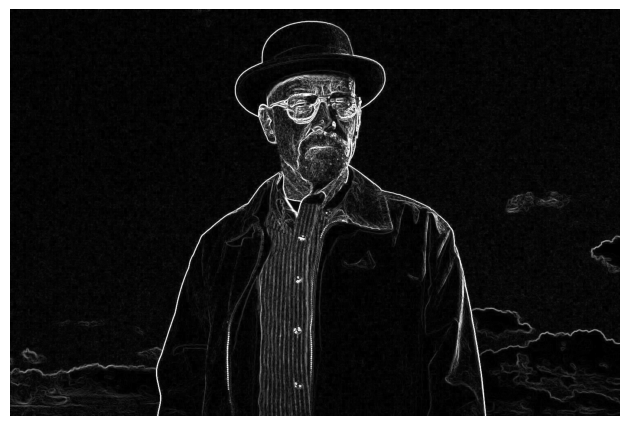

In [ ]:
plt.imshow(sobel_filter(image),cmap='grey')
plt.axis('off')
plt.tight_layout()
plt.show()